# Programming for Data Analysis Project 2018 #

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:  
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.  
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.  
• Synthesise/simulate a data set as closely matching their properties as possible.  
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.  
  
Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. The next section gives an example project idea.

...After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that a normal distribution is an acceptable model of such a variable. Likewise, I investigate the other four variables, and I also look at the relationships between the variables. I devise an algorithm (or method) to generate such a data set, simulating values of the four variables for two-hundred students. I detail all this work in my notebook, and then I add some code in to generate a data set with those properties.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
df = pd.read_csv("/Users/joanhealy1/Documents/GMIT-semester-2/data-analysis-project/gapminder.csv")
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [19]:
df.tail()

,country,year,pop,continent,lifeExp,gdpPercap
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143.0,Africa,43.487,469.709298


## Step 1 - look at data ##

Observations -
European and North American population have the highest life expectancy.
Countries in the 'global south' have significantly lower life expectancies.

Assumptions -



I assumed that countries with higher average life expectancies include -

Countries with a higher GDP per capita.

Socioeconomically egalitarian countries with better social welfare systems ie: Canada, Northern Europe (Norway/Sweden/Denmark/Finland/Germany/Netherlands), Japan, New Zealand, Spain, Botswana, Singapore.

Current and former colonisers - GB, Belgium, Spain, France

Countries which have a significant wealth gap between rich and poor classes; ie: US, China, South Africa, Russia, might have a high average life expectancy. When studied in more granular detail this mean might in fact be skewed by outliers (rich people) whereas most of the population could actually have very low life expectancies. The median or mode might be more appropriate in these cases.

Eastern European countries in the former soviet block due to their legacies of strong government support and more revenue from open markets 

Countries that are in some form of economic 'union', with trade agreements, more open markets etc. 

Democracies

Countries with smaller populations.



I assumed that countries with lower life expectancies include -

The so called 'global south' such as most African countries, most South American countries and many asian countries, in particular India.

Countries undergoing severe economic recessions ie: Greece, Venezuela

Wartorn countries; Syria, Afghanistan, DRC

Countries with high illegal drug production due to the government's 'war on drugs', gang violence etc; Mexico, Columbia, Brazil

Countries with a high rate of government corruption.

Totalitarian countries with military dictatorships, absolute monarchies, oligarchies ie Saudi Arabia, Iran, North Korea.

Countries that are economically isolationist ie: N Korea.



I would also assume that in general life expectancies increase over time, especially in countries such as China which migrated from isolationist trade policies to globalised ones. This upward trend would probably plateau however as the downsides of industrialisation/consumerism take their toll; pollution increasing cancer rates, western diets increasing obesity rates etc.

I would assume that countries that transition from communist economies to capitalist ones don't necessarily have increasing life expectancies, but that the relationship of class becomes the causal factor.

In [20]:
df[50:500]

,country,year,pop,continent,lifeExp,gdpPercap
50,Argentina,1962,21283783.0,Americas,65.142,7133.166023
51,Argentina,1967,22934225.0,Americas,65.634,8052.953021
52,Argentina,1972,24779799.0,Americas,67.065,9443.038526
53,Argentina,1977,26983828.0,Americas,68.481,10079.026740
54,Argentina,1982,29341374.0,Americas,69.942,8997.897412
55,Argentina,1987,31620918.0,Americas,70.774,9139.671389
56,Argentina,1992,33958947.0,Americas,71.868,9308.418710
57,Argentina,1997,36203463.0,Americas,73.275,10967.281950
58,Argentina,2002,38331121.0,Americas,74.340,8797.640716
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


In [21]:
sns.lineplot(x="country", y="year", data=df)

AttributeError: module 'seaborn' has no attribute 'lineplot'

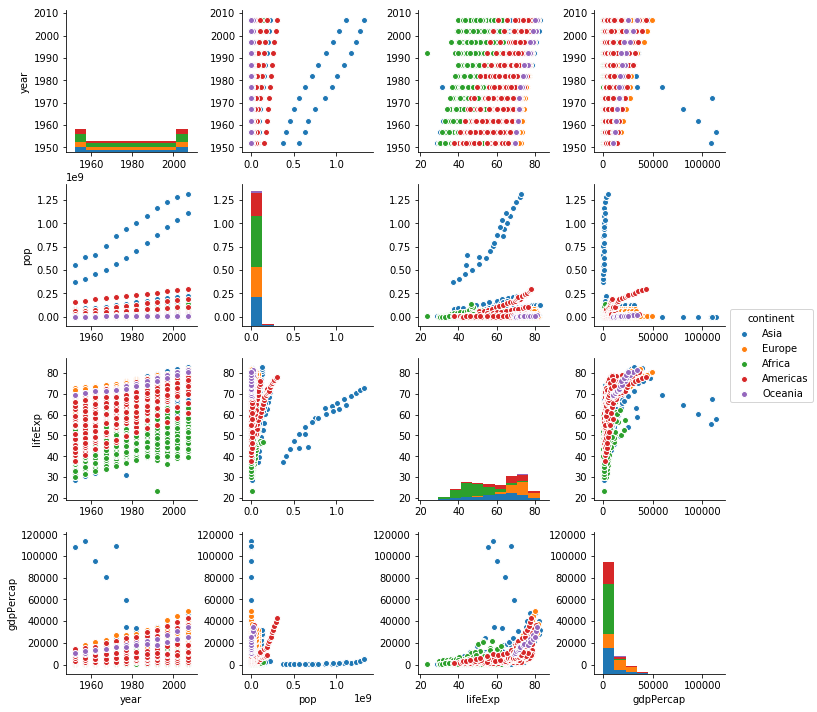

In [22]:
sns.pairplot(df, hue="continent")
